In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [2]:
telecom = pd.read_csv (r'C:\Data Science course\telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
telecom.shape

(99999, 226)

We can see that there are almost 1 lakh rows and 226 columns in the original dataset.
Lets look at the data types of the various columns in the dataset.

In [4]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

As we can see that date columns are having object type. So we will convert it into datetime

In [5]:
#Extracting the columns with object data type in a separate list 
date_type_cols = telecom.dtypes[telecom.dtypes == np.object ]
date_type_cols = list(date_type_cols.index)
date_type_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [6]:
#Converting all the columns in the above list to datatime object type
for col in date_type_cols:
    telecom[col] = pd.to_datetime(telecom[col], format = '%m/%d/%Y', errors= 'coerce')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [7]:
#Confirming the datatypes 
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

### Missing Value Analysis and Imputation

In [8]:
# Columnwise null value analysis
column_wise_null = (telecom.isnull().sum()*100/len(telecom)).sort_values(ascending= False)
column_wise_null = column_wise_null[column_wise_null != 0] #columns where null values are present
column_wise_null

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

In [9]:
len(column_wise_null)

166

We can see that there are 166 columns where there are some null values.

We can also see from above that there are some columns where the various recharge amounts are NA i.e. the customer have not done recharge. The corrosponding date of recharge was also not available hence it is null.
So we will impute various columns related to the recharge amounts with zero.

In [10]:
recharge_amounts = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# impute missing values with 0
telecom[recharge_amounts] = telecom[recharge_amounts].apply(lambda x: x.fillna(0))

#### Column analysis

In [11]:
telecom['night_pck_user_6'].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [12]:
telecom['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

As we can see that night_pck_user and fb_user are categorical variable.

In [13]:
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
             'fb_user_8','fb_user_9']
#We will fill the null values with zero since these customers are not activated for these facilities
telecom[cat_cols] = telecom[cat_cols].apply(lambda x: x.fillna(0))

In [14]:
#Rechecking the null values again
column_wise_null = (telecom.isnull().sum()*100/len(telecom)).sort_values(ascending= False)
column_wise_null = column_wise_null[column_wise_null > 70]
column_wise_null

arpu_3g_6                   74.846748
date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
arpu_2g_9                   74.077741
arpu_3g_9                   74.077741
count_rech_3g_9             74.077741
count_rech_3g_8             73.660737
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
date_of_last_rech_data_8    73.660737
count_rech_2g_8             73.660737
dtype: float64

In [15]:
#Dropping the columns with more than 70 percent missing values
telecom = telecom.drop(list(column_wise_null.index)+['mobile_number'],axis=1)
telecom.shape

(99999, 205)

Now we can see that the no of columns are now 205 only

### Filter High-Value Customers

In [16]:
# Total data recharge amount for June and July
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

# Total recharge amount for June and July 
telecom['total_amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['total_amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

# Average recharge amount for June and July 
telecom['Avg_Recharge_Amt'] = (telecom.total_rech_amt_6 + telecom.total_data_rech_6 + telecom.total_rech_amt_7 + telecom.total_data_rech_7)/2

In [17]:
#Checking various percentile values for Avg_Recharge_Amt
telecom['Avg_Recharge_Amt'].describe(percentiles=[0.25, 0.5, 0.7, .75])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
max      61236.000000
Name: Avg_Recharge_Amt, dtype: float64

As we can see that 70th percentile value of average recharge amount is Rs. 478

####  Keeping only those customers who have recharged their mobiles with more than or equal to Rs. 478/month during the month of June and July 

In [18]:
high_value_cust = telecom[telecom['Avg_Recharge_Amt'] >= telecom['Avg_Recharge_Amt'].quantile(0.7)]
high_value_cust.shape

(30001, 210)

In [19]:
# delete variables created to filter high-value customers
high_value_cust = high_value_cust.drop(['total_data_rech_6', 'total_data_rech_7','total_amt_data_6', 'total_amt_data_7'], axis=1)
high_value_cust.shape

(30001, 206)

### Calculating Churn Variable based on the usage in the 9th month

In [20]:
#Total incoming and outgoing usage
high_value_cust['total_calls_mou_9'] = high_value_cust.total_ic_mou_9 + high_value_cust.total_og_mou_9

#Total Data Usage
high_value_cust['total_internet_mb_9'] =  high_value_cust.vol_2g_mb_9 + high_value_cust.vol_3g_mb_9

# 0:not churn, 1: Churn
high_value_cust['churn'] = high_value_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

# Deleting the columns used for deriving churn 
high_value_cust = high_value_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [21]:
high_value_cust['churn'].value_counts(normalize= True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

#### We can say from above that the present churn rate is around 8 percent.  
Now we will drop all the columns for the 9th month

In [22]:
#Preparing a list of all columns for 9th month i.e. ending with _9 cols
col_month_9 = [x for x in high_value_cust.columns if x[-2:]=="_9" ]
col_month_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [23]:
# deleting the above columns 
high_value_cust = high_value_cust.drop(col_month_9, axis=1)

In [24]:
high_value_cust.shape

(30001, 158)

We can see that now we are having 30k rows and 158 columns.

## EDA

In [25]:
#Checking the unique values present in each of the columns
unique = high_value_cust.nunique().sort_values()
unique

circle_id                   1
std_og_t2c_mou_8            1
std_ic_t2o_mou_6            1
std_ic_t2o_mou_7            1
std_ic_t2o_mou_8            1
std_og_t2c_mou_7            1
std_og_t2c_mou_6            1
last_date_of_month_7        1
last_date_of_month_6        1
loc_ic_t2o_mou              1
std_og_t2o_mou              1
loc_og_t2o_mou              1
last_date_of_month_8        1
fb_user_8                   2
fb_user_7                   2
night_pck_user_8            2
night_pck_user_7            2
night_pck_user_6            2
fb_user_6                   2
churn                       2
monthly_2g_6                5
monthly_2g_8                6
monthly_2g_7                6
monthly_3g_8               12
monthly_3g_6               12
monthly_3g_7               15
sachet_3g_6                25
sachet_3g_7                27
sachet_3g_8                29
date_of_last_rech_6        30
date_of_last_rech_8        31
sachet_2g_6                31
date_of_last_rech_7        31
sachet_2g_

We can see from above that there are certain columns where there is only a single unique value and hence the column is not of any use for our analysis.
So we will drop these cols also.

In [26]:
high_value_cust = high_value_cust.drop(unique[unique == 1].index, axis=1)
high_value_cust.shape

(30001, 145)

In [27]:
#Checking row wise null
row_wise_null = high_value_cust.isnull().sum(axis=1)/high_value_cust.shape[1]
row_wise_null = row_wise_null[row_wise_null > 0.50].sort_values(ascending = False) #rows where there are more than 50 percent null values
row_wise_null

53460    0.572414
74778    0.572414
80932    0.572414
46858    0.572414
4190     0.572414
           ...   
67754    0.558621
67733    0.558621
66174    0.558621
65828    0.558621
51478    0.558621
Length: 254, dtype: float64

As we can see that there are 254 rows where there are more than 50 percent missing values so we will drop these rows.

In [28]:
high_value_cust = high_value_cust.drop(row_wise_null.index, axis=0)
high_value_cust.shape

(29747, 145)

In [29]:
high_value_cust.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29747 entries, 0 to 99997
Data columns (total 145 columns):
 #   Column               Dtype         
---  ------               -----         
 0   arpu_6               float64       
 1   arpu_7               float64       
 2   arpu_8               float64       
 3   onnet_mou_6          float64       
 4   onnet_mou_7          float64       
 5   onnet_mou_8          float64       
 6   offnet_mou_6         float64       
 7   offnet_mou_7         float64       
 8   offnet_mou_8         float64       
 9   roam_ic_mou_6        float64       
 10  roam_ic_mou_7        float64       
 11  roam_ic_mou_8        float64       
 12  roam_og_mou_6        float64       
 13  roam_og_mou_7        float64       
 14  roam_og_mou_8        float64       
 15  loc_og_t2t_mou_6     float64       
 16  loc_og_t2t_mou_7     float64       
 17  loc_og_t2t_mou_8     float64       
 18  loc_og_t2m_mou_6     float64       
 19  loc_og_t2m_mou_7     flo

#### Null Value Imputation for select column

In [30]:
column_wise_null = (high_value_cust.isnull().sum()*100/len(high_value_cust)).sort_values(ascending= False)
column_wise_null = column_wise_null[column_wise_null != 0]
column_wise_null

loc_ic_t2t_mou_8       3.092749
ic_others_8            3.092749
std_og_mou_8           3.092749
loc_og_t2m_mou_8       3.092749
spl_ic_mou_8           3.092749
loc_og_t2f_mou_8       3.092749
isd_ic_mou_8           3.092749
loc_og_t2c_mou_8       3.092749
loc_og_mou_8           3.092749
std_ic_t2f_mou_8       3.092749
og_others_8            3.092749
std_og_t2t_mou_8       3.092749
spl_og_mou_8           3.092749
std_og_t2m_mou_8       3.092749
isd_og_mou_8           3.092749
std_og_t2f_mou_8       3.092749
loc_og_t2t_mou_8       3.092749
std_ic_mou_8           3.092749
offnet_mou_8           3.092749
loc_ic_mou_8           3.092749
roam_og_mou_8          3.092749
std_ic_t2m_mou_8       3.092749
loc_ic_t2m_mou_8       3.092749
loc_ic_t2f_mou_8       3.092749
roam_ic_mou_8          3.092749
onnet_mou_8            3.092749
std_ic_t2t_mou_8       3.092749
date_of_last_rech_8    1.879181
ic_others_6            0.978250
std_ic_mou_6           0.978250
std_ic_t2t_mou_6       0.978250
loc_ic_m

Except the last two items in the above list all are numerical columns so we will inpute the null values using Iterative Imputer and we will drop the columns with datetime type.

In [31]:
#Deleting the date time column
for col in column_wise_null.index:
    if(high_value_cust[col].dtypes == "datetime64[ns]"):
        high_value_cust.drop(col, axis=1, inplace=True)
        column_wise_null.drop(col,inplace=True)

In [32]:
from fancyimpute import IterativeImputer 
iter_imputer = IterativeImputer()
high_value_cust[column_wise_null.index] = iter_imputer.fit_transform(high_value_cust[column_wise_null.index])

In [33]:
column_wise_null = (high_value_cust.isnull().sum()*100/len(high_value_cust)).sort_values(ascending= False)
column_wise_null = column_wise_null[column_wise_null != 0]
column_wise_null

Series([], dtype: float64)

We can see that there are no values present now.

In [34]:
high_value_cust.shape

(29747, 142)

### Correlation among variables 

In [35]:
corr = high_value_cust.corr()
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_Amt,churn
arpu_6,1.000000,0.674119,0.614082,0.337714,0.217075,0.190466,0.504347,0.341873,0.292979,0.125262,0.083148,0.092593,0.194083,0.141951,0.126642,0.163622,0.128020,0.125777,0.326677,0.246487,0.223313,0.136516,0.114649,0.106015,0.044365,0.015531,0.016870,0.323264,0.247620,0.228522,0.270467,0.162050,0.136074,0.297815,0.182054,0.142166,0.065154,0.053659,0.044619,0.381399,0.231465,0.185565,0.465912,0.437017,0.439553,0.119028,0.074744,0.054998,0.052729,0.025513,0.014680,0.555752,0.363159,0.301386,0.078340,0.062964,0.064746,0.181574,0.149872,0.128404,0.047624,0.039127,0.038830,0.174344,0.143164,0.128734,0.086094,0.061697,0.057864,0.095550,0.065773,0.064212,0.032842,0.032595,0.023530,0.121519,0.085824,0.080991,0.225020,0.167687,0.149334,0.027418,-0.034189,-0.009145,0.100242,0.064435,0.079090,0.015450,0.038442,0.014282,0.348716,0.134886,0.118016,0.946109,0.652938,0.604996,0.339247,0.266891,0.287102,0.269967,0.211707,0.201676,-0.109350,-0.176119,-0.122549,0.078289,-0.017257,0.028584,0.118892,-0.023253,0.031234,-0.063256,-0.099951,-0.078908,0.156001,0.073581,0.087365,0.014258,-0.004938,0.009835,-0.040085,-0.085534,-0.062113,-0.159792,-0.195386,-0.153418,0.183731,0.087413,0.107714,-0.002038,-0.025585,-0.017014,-0.117903,-0.195139,-0.139112,0.038377,0.058512,0.055572,0.112434,0.045051,0.370122,0.069009
arpu_7,0.674119,1.000000,0.760234,0.210709,0.315525,0.262881,0.352164,0.484391,0.387693,0.092577,0.092534,0.092328,0.133198,0.178365,0.149513,0.105730,0.153996,0.129539,0.214475,0.296663,0.246568,0.111396,0.137731,0.116735,0.008303,0.037860,0.029300,0.212485,0.297957,0.246424,0.165816,0.256622,0.214068,0.203036,0.303633,0.233159,0.051338,0.069090,0.051248,0.247813,0.376629,0.297986,0.421674,0.504097,0.446743,0.066011,0.110705,0.064582,0.017497,0.025979,0.018236,0.363533,0.535081,0.427747,0.044592,0.071791,0.066982,0.114366,0.164084,0.132864,0.031459,0.043227,0.039981,0.107545,0.158319,0.133172,0.058107,0.082430,0.084043,0.068955,

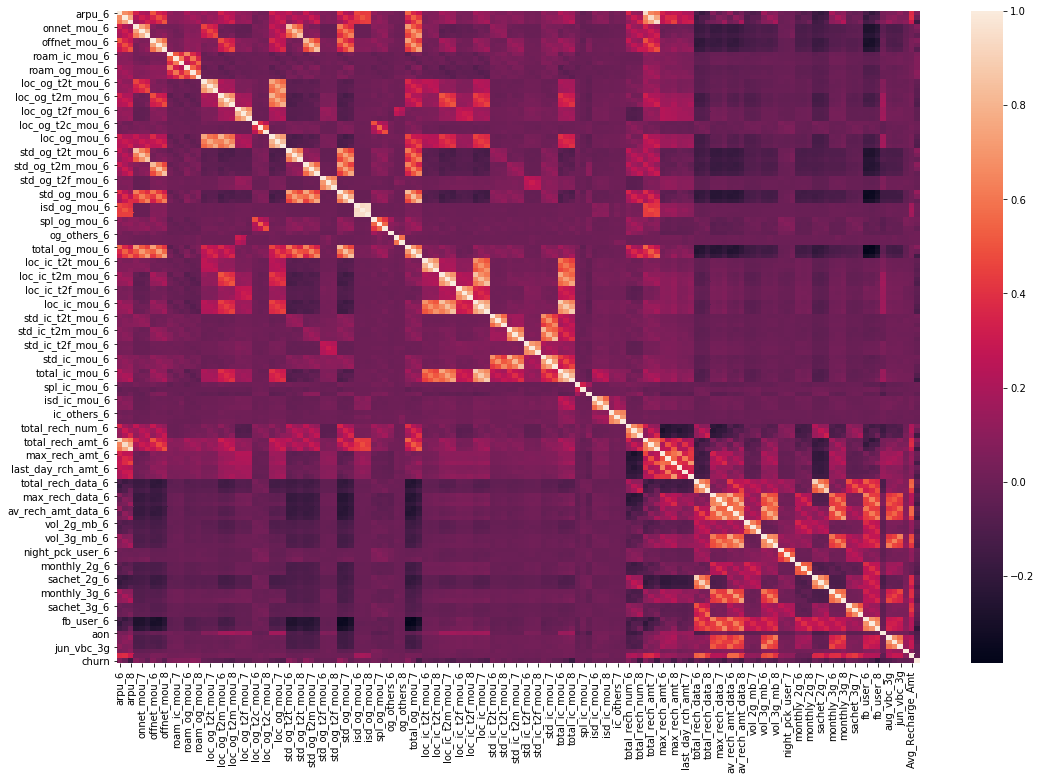

In [36]:
plt.figure(figsize=(18,12))
sns.heatmap(corr)

We can see from the above correlation graph that there are certain light pockets visible in the bottom right where the corr is higher

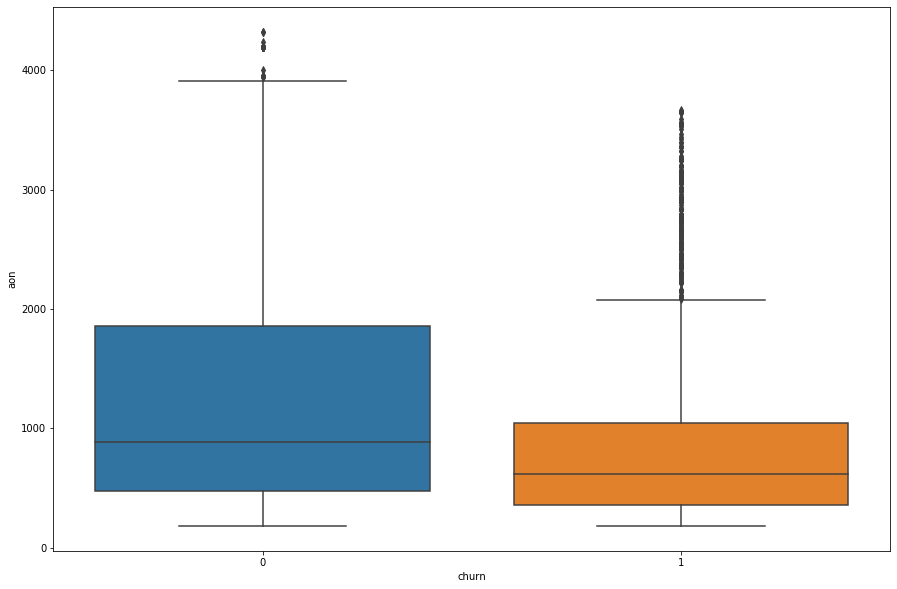

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x=high_value_cust["churn"],y=high_value_cust["aon"])

In [38]:
high_value_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Avg_Recharge_Amt', 'churn'],
      dtype='object', length=142)

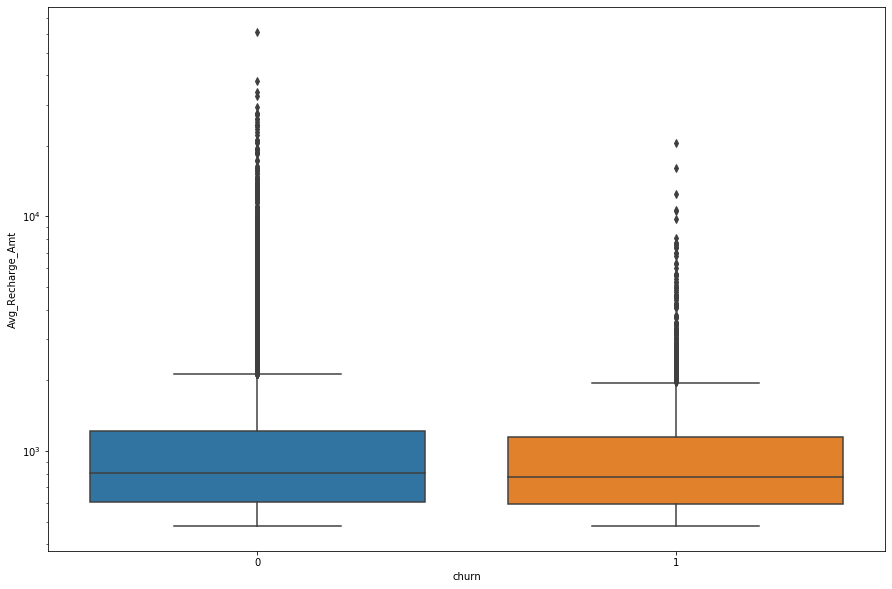

In [39]:
plt.figure(figsize=(15,10))
plt.yscale('log')
sns.boxplot(x=high_value_cust["churn"],y=high_value_cust['Avg_Recharge_Amt'])

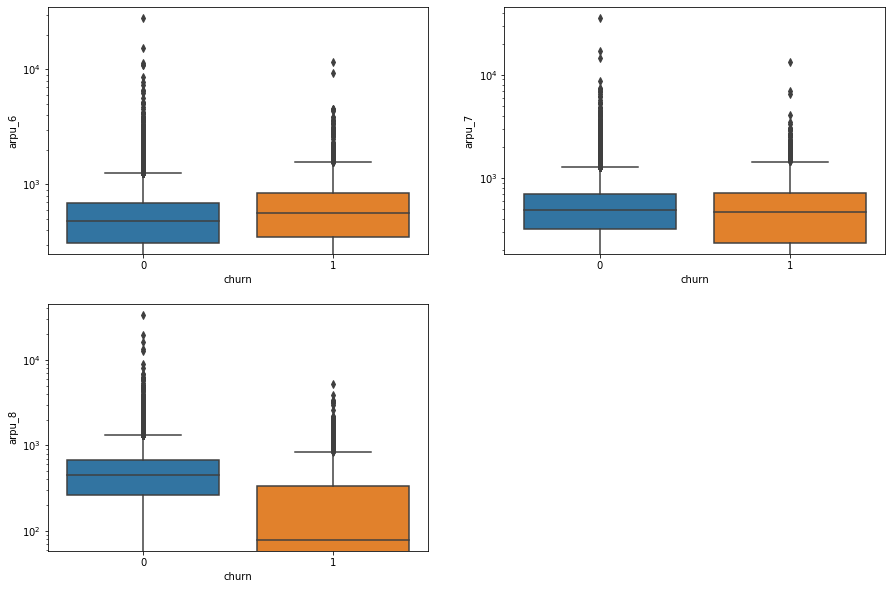

In [40]:
plt.figure(figsize=(15,10))
plt.yscale('log')
plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(x=high_value_cust["churn"],y=high_value_cust['arpu_6'])
plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(x=high_value_cust["churn"],y=high_value_cust['arpu_7'])
plt.subplot(2,2,3)
plt.yscale('log')
sns.boxplot(x=high_value_cust["churn"],y=high_value_cust['arpu_8'])


As we can see that there is a sudden drop in the average revenue per user for 8th month. Hence this is a good candidate for derived variable. 

In [41]:
high_value_cust['arpu_diff'] = high_value_cust['arpu_8'] - ((high_value_cust['arpu_7'] + high_value_cust['arpu_6'])/2)

## Derived Variables 

We will now try to devise some derived variables which may help us in our analysis. Based on business knowledge of telecom industry in general customers using service provider for outgoing calls are more beneficial to the company than customers using it for incoming calls.
So we will try to take a ratio of outgoing/incoming calls to do some analysis.

In [42]:
#Adding 1 to the denominator to handle zero incomning min cases
high_value_cust['loc_og_ic_ratio_mou_6'] = (high_value_cust['loc_og_mou_6'])/(high_value_cust['loc_ic_mou_6']+1)
high_value_cust['loc_og_ic_ratio_mou_7'] = (high_value_cust['loc_og_mou_7'])/(high_value_cust['loc_ic_mou_7']+1)
high_value_cust['loc_og_ic_ratio_mou_8'] = (high_value_cust['loc_og_mou_8'])/(high_value_cust['loc_ic_mou_8']+1)

#Grouping above columns for churn 
high_value_cust.groupby('churn')['loc_og_ic_ratio_mou_6','loc_og_ic_ratio_mou_7','loc_og_ic_ratio_mou_8'].mean()


,loc_og_ic_ratio_mou_6,loc_og_ic_ratio_mou_7,loc_og_ic_ratio_mou_8
churn,,,
0,2.143264,2.185136,2.088737
1,1.756821,1.808024,1.419476


As we can see that there is a considerable difference between the churn in cases where there are more outgoing calls. So we will keep these derived variables.
We can also tell from business logic that difference in the recharge amount and other variables in case of 8th month and average of 6th and 7th month can also be a good indication whether the customer is going to continue the servie or not. 

In [43]:
high_value_cust['total_rech_num_diff'] = high_value_cust['total_rech_num_8'] - ((high_value_cust['total_rech_num_6'] + high_value_cust['total_rech_num_7'])/2)

high_value_cust['total_rech_amt_diff'] = high_value_cust['total_rech_amt_8'] - ((high_value_cust['total_rech_amt_6'] + high_value_cust['total_rech_amt_7'])/2)

high_value_cust['max_rech_amt_diff'] = high_value_cust['max_rech_amt_8'] - ((high_value_cust['max_rech_amt_6'] + high_value_cust['max_rech_amt_7'])/2)

high_value_cust['total_rech_data_diff'] = high_value_cust['total_rech_data_8'] - ((high_value_cust['total_rech_data_6'] + high_value_cust['total_rech_data_7'])/2)

high_value_cust['max_rech_data_diff'] = high_value_cust['max_rech_data_8'] - ((high_value_cust['max_rech_data_6'] + high_value_cust['max_rech_data_7'])/2)

#Grouping above columns over churn
high_value_cust.groupby('churn')['total_rech_num_diff','total_rech_amt_diff','max_rech_amt_diff','total_rech_data_diff','max_rech_data_diff'].mean()

,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff
churn,,,,,
0,-1.319451,-42.742070,-4.13788,-0.059623,-3.468245
1,-7.631915,-461.208511,-77.40766,-1.032553,-33.693191


As we can see that there is a cosniderable difference in the average value for the 6th and 7th month and 8th month for churners and non-churners. So choice of derived variable looks good. 

### Modeling Using PCA

In [44]:
PCA_data = high_value_cust.copy()

In [45]:
PCA_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29747 entries, 0 to 99997
Data columns (total 151 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

Now we will split the Target variable and predictor variables. Also we will split train and test data.

In [46]:
X = PCA_data.drop("churn", axis = 1)
y = PCA_data.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100, stratify = y)

In [47]:
X_train['night_pck_user_6'].value_counts()

0.0    20530
1.0      292
Name: night_pck_user_6, dtype: int64

In [48]:
X_train['fb_user_8'].value_counts()

0.0    10931
1.0     9891
Name: fb_user_8, dtype: int64

We can see that as the values for categorical columns is already 1 or 0,it is not required to dummify the variables.

#### Scaling the Data

In [49]:
scaler = StandardScaler()

In [50]:
pca_log_X_train = X_train.copy()
pca_log_X_test = X_test.copy()
pca_log_X_train[pca_log_X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

#Scale the test variable
pca_log_X_test[pca_log_X_test.columns] = scaler.transform(X_test[X_test.columns])

pca_log_X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_Amt,arpu_diff,loc_og_ic_ratio_mou_6,loc_og_ic_ratio_mou_7,loc_og_ic_ratio_mou_8,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff
99988,-0.524291,-0.099241,-0.208556,-0.141430,-0.201652,-0.528174,-0.425724,-0.214648,-0.209312,-0.209900,-0.163265,-0.166592,-0.228886,-0.208227,-0.194082,0.355078,0.237861,-0.349612,-0.112761,-0.069191,-0.125650,-0.287788,-0.284720,-0.302963,-0.256707,-0.210804,-0.233544,0.129484,0.092384,-0.317320,-0.342178,-0.353911,-0.387592,-0.354820,-0.143734,-0.102568,-0.151306,-0.143505,-0.151263,-0.470622,-0.334794,-0.331185,-0.045036,-0.044635,-0.044788,-0.334058,-0.340072,-0.336365,-0.14307,-0.017277,-0.017822,-0.347504,-0.250625,-0.438701,-0.119966,-0.398095,-0.409942,0.420008,0.468431,4.571027,-0.023254,0.244743,0.127397,0.234095,0.166290,3.023011,-0.063998,-0.030263,-0.168980,6.513924,0.383447,0.568239,-0.099991,-0.158017,-0.101388,4.572647,0.237094,0.309064,1.943658,0.207959,2.660722,-0.404562,-0.107076,-0.24358,-0.135264,-0.145570,-0.164176,-0.064517,-0.090624,-0.073664,0.002646,0.022324,-0.114290,-0.494517,-0.184546,-0.129454,-0.679454,-0.095122,-0.030423,-0.348665,-0.350578,-0.298876,-0.581870,-0.275986,-0.209238,-0.698705,0.676737,0.781245,-0.646910,0.078762,0.176357,-0.383218,-0.376670,-0.330934,-0.363214,-0.381571,0.371404,-0.119261,-0.113538,-0.106611,-0.40388,1.824605,2.094869,-0.426429,-0.447733,-0.417009,-0.349099,-0.347687,-0.340675,-0.212647,-0.206906,-0.184247,-1.033507,0.954451,1.051259,-0.921106,-0.153556,-0.406549,-0.378670,-0.152552,-0.438592,0.116023,-0.049791,-0.043739,-0.084840,-0.172446,0.267848,0.468199,0.280390,1.108967
89804,0.732935,0.904744,-0.544154,1.974404,2.819781,-0.001131,-0.513521,-0.269942,-0.673430,-0.209900,-0.163265,-0.166592,-0.228886,-0.208227,-0.194082,-0.174415,-0.058521,-0.314543,-0.236687,-0.324294,-0.667829,-0.287788,-0.284720,-0.237677,-0.256707,-0.210804,-0.234877,-0.280844,-0.262678,-0.638008,2.384174,

As we can see that the columns are now scaled. So we will apply PCA to the data.

In [51]:
pca_log_X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Recharge_Amt,arpu_diff,loc_og_ic_ratio_mou_6,loc_og_ic_ratio_mou_7,loc_og_ic_ratio_mou_8,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff
99988,-0.524291,-0.099241,-0.208556,-0.141430,-0.201652,-0.528174,-0.425724,-0.214648,-0.209312,-0.209900,-0.163265,-0.166592,-0.228886,-0.208227,-0.194082,0.355078,0.237861,-0.349612,-0.112761,-0.069191,-0.125650,-0.287788,-0.284720,-0.302963,-0.256707,-0.210804,-0.233544,0.129484,0.092384,-0.317320,-0.342178,-0.353911,-0.387592,-0.354820,-0.143734,-0.102568,-0.151306,-0.143505,-0.151263,-0.470622,-0.334794,-0.331185,-0.045036,-0.044635,-0.044788,-0.334058,-0.340072,-0.336365,-0.143070,-0.017277,-0.017822,-0.347504,-0.250625,-0.438701,-0.119966,-0.398095,-0.409942,0.420008,0.468431,4.571027,-0.023254,0.244743,0.127397,0.234095,0.166290,3.023011,-0.063998,-0.030263,-0.168980,6.513924,0.383447,0.568239,-0.099991,-0.158017,-0.101388,4.572647,0.237094,0.309064,1.943658,0.207959,2.660722,-0.404562,-0.107076,-0.243580,-0.135264,-0.145570,-0.164176,-0.064517,-0.090624,-0.073664,0.002646,0.022324,-0.114290,-0.494517,-0.184546,-0.129454,-0.679454,-0.095122,-0.030423,-0.348665,-0.350578,-0.298876,-0.581870,-0.275986,-0.209238,-0.698705,0.676737,0.781245,-0.646910,0.078762,0.176357,-0.383218,-0.376670,-0.330934,-0.363214,-0.381571,0.371404,-0.119261,-0.113538,-0.106611,-0.40388,1.824605,2.094869,-0.426429,-0.447733,-0.417009,-0.349099,-0.347687,-0.340675,-0.212647,-0.206906,-0.184247,-1.033507,0.954451,1.051259,-0.921106,-0.153556,-0.406549,-0.378670,-0.152552,-0.438592,0.116023,-0.049791,-0.043739,-0.084840,-0.172446,0.267848,0.468199,0.280390,1.108967
89804,0.732935,0.904744,-0.544154,1.974404,2.819781,-0.001131,-0.513521,-0.269942,-0.673430,-0.209900,-0.163265,-0.166592,-0.228886,-0.208227,-0.194082,-0.174415,-0.058521,-0.314543,-0.236687,-0.324294,-0.667829,-0.287788,-0.284720,-0.237677,-0.256707,-0.210804,-0.234877,-0.280844,-0.262678,-0.638008,2.38417

In [52]:
pca = PCA( random_state=100)
pca.fit(pca_log_X_train)

PCA(random_state=100)

In [53]:
pd.Series(pca.explained_variance_ratio_.cumsum())

0      0.100770
1      0.184194
2      0.243267
3      0.287180
4      0.326135
5      0.358797
6      0.390125
7      0.417503
8      0.442398
9      0.465131
10     0.486905
11     0.507254
12     0.526389
13     0.544521
14     0.561954
15     0.578230
16     0.593934
17     0.608948
18     0.623306
19     0.637069
20     0.650652
21     0.663522
22     0.676112
23     0.687607
24     0.698827
25     0.709407
26     0.719738
27     0.729274
28     0.738242
29     0.746919
30     0.755339
31     0.763356
32     0.771269
33     0.778957
34     0.786108
35     0.793120
36     0.799860
37     0.806315
38     0.812725
39     0.818951
40     0.824765
41     0.830522
42     0.836124
43     0.841589
44     0.846980
45     0.852238
46     0.857308
47     0.862277
48     0.866970
49     0.871568
50     0.876012
51     0.880241
52     0.884369
53     0.888402
54     0.892215
55     0.895803
56     0.899333
57     0.902825
58     0.906172
59     0.909425
60     0.912565
61     0.915683
62     0

We can see from above that around 56 variables explain the 90 percent variance in the data, 74 variables explain 95% variance and around 100 variables explain 99% variance.The same can be visualised with a plot given below:

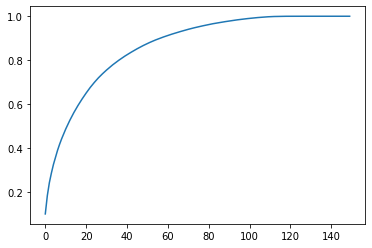

In [54]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot();

So now we will build a model with Logistic Regression and 70 PCA variables using pipeline

In [55]:
# Operations to be performed in the pipeline
ops = [("pca", PCA(n_components= 70)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
#Creating the pipeline with above observations
pipeline = Pipeline(ops)

In [56]:
# fit model
pipeline.fit(pca_log_X_train, y_train)

# check score on train data
pipeline.score(pca_log_X_train, y_train)

0.8032369609067332

##### We are getting 80 percent score for train data using pipeline.

In [57]:
# predict churn on test data
y_test_pred = pipeline.predict(pca_log_X_test)

# create confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Check Sensitivity and Specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Lets see AUC
y_test_pred_prob = pipeline.predict_proba(pca_log_X_test)[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

result_comp = pd.DataFrame({'Method':['PCA_Logistic'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp


[[6580 1640]
 [ 120  585]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.8,0.87


As we can see that with PCA we are getting 80 percent specificity and 83 percent sensitivity.

# Hyperparameter tuning 
- Now we will do the hyperparameter tuning
For logisitc regression hyperparameter tuning help of following video was undertaken as the same was not covered in module

https://www.youtube.com/watch?v=pooXM9mM7FU

In [58]:
# Creating a PCA object
pca = PCA()

# Creating a logistic Regression obj with the class weight balanced as there is imbalance in data
log_reg = LogisticRegression(class_weight='balanced')

# Pipeline Operations Sequence
ops = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("log_reg", log_reg)
        ]

# Create a pipeline object with above operations
pca_log_rig_pipe = Pipeline(ops)

# hyperparameter combination 
params = {'pca__n_components': [60,70,80], 'log_reg__C': [0.1, 0.5, 1, 3, 5, 10], 
          'log_reg__penalty': ['l1', 'l2']}

# Initialising a 5 fold Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Initialising a gridsearchcv object
model = GridSearchCV(estimator=pca_log_rig_pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [59]:
# fit the grid search cv with data
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('log_reg',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.5, 1, 3, 5, 10],
                         'log_reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 70, 80]},
             scoring='roc_auc', verbose=1)

In [60]:
# Converting the Cross Validation Results to Dataframe for a better visualisation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_log_reg__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.556969,0.023908,0.000000,0.000000,0.1,l1,60,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
1,1.640746,0.034074,0.000000,0.000000,0.1,l1,70,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,1.923167,0.051826,0.000000,0.000000,0.1,l1,80,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,2.004451,0.055007,0.058569,0.004542,0.1,l2,60,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.873582,0.890408,0.871751,0.891953,0.875126,0.880564,0.008747,16
4,2.400086,0.119384,0.055215,0.010730,0.1,l2,70,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.872778,0.892255,0.875406,0.895128,0.878387,0.882791,0.009121,12
5,2.603429,0.116235,0.052129,0.008722,0.1,l2,80,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.874985,0.894486,0.877762,0.893942,0.878792,0.883993,0.008439,4
6,1.488410,0.067974,0.000000,0.000000,0.5,l1,60,"{'log_reg__C': 0.5, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
7,1.617322,0.028098,0.000000,0.000000,0.5,l1,70,"{'log_reg__C': 0.5, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
8,1.775746,0.113074,0.000000,0.000000,0.5,l1,80,"{'log_reg__C': 0.5, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
9,2.044494,0.152019,0.056126,0.014650,0.5,l2,60,"{'log_reg__C': 0.5, 'log_reg__penalty': 'l2', ...",0.872183,0.889490,0.871206,0.891243,0.874316,0.879688,0.008795,18


In [61]:
#Best model parameters
model.best_params_

{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'pca__n_components': 80}

We can see that model performs optimally when we use 80 PCA variables, l2 regularisation and C value of 3

In [62]:
#Optimal Model Score
model.best_score_

0.8840792500609211

The AUC score of best model is 0.88 i.e.88%.
Now we will test the model performance on test data.

In [63]:
# Predicting the y value on test data
y_test_pred = model.predict(X_test)

# Creating a onfusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Checking the sensitivity and specificity values for the test data
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Area under Curve (AUC)
y_test_pred_prob = model.predict_proba(X_test)[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

tempResults = pd.DataFrame({'Method':['PCA_GridSearch_Logistic'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp = pd.concat([result_comp, tempResults])
result_comp

[[6638 1582]
 [ 122  583]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.80,0.87
0,PCA_GridSearch_Logistic,0.83,0.81,0.87


As we can see that the specificity with GridSearch CV was increased to 81%.
Now we will try some other algorithm.

### Random Forest

In [64]:
#Initialising the Random Forest Classifier Object
ran_forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

n_estimators = [20,50,100] #No of Trees
max_depth = [3, 6] #MaxDepth for Tree
min_samples_split = [10, 15, 20] #Minimum samples in a node for split
min_samples_leaf = [2, 5, 10] #Minimum samples in a tre leaf

#Hyperparameters for GridSearchCV
hyper_params = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

#4 fold cross validation with GridSearch
model_forest = GridSearchCV(estimator=ran_forest, cv=4, param_grid=hyper_params, scoring='roc_auc', n_jobs=-1, verbose=1 )

# fitting the model
model_forest.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.3min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [65]:
# Converting the Cross Validation Results to Dataframe for a better visualisation
pd.DataFrame(model_forest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.941339,0.141135,0.212918,0.101848,3,2,10,20,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.918943,0.920720,0.922496,0.895182,0.914335,0.011129,50
1,1.776209,0.425351,0.530252,0.395476,3,2,10,50,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.919590,0.921149,0.926047,0.899625,0.916603,0.010088,44
2,4.007750,0.353536,0.521702,0.253858,3,2,10,100,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.919391,0.924041,0.925355,0.902156,0.917736,0.009264,41
3,0.680327,0.089611,0.360301,0.124667,3,2,15,20,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.917081,0.922147,0.920804,0.905441,0.916368,0.006576,46
4,1.691290,0.292792,0.574178,0.216597,3,2,15,50,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.918702,0.923995,0.924751,0.905129,0.918144,0.007867,36
5,3.691177,0.447212,0.454125,0.306649,3,2,15,100,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.919120,0.926465,0.928574,0.906453,0.920153,0.008653,25
6,0.988683,0.265040,0.309573,0.068205,3,2,20,20,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.917365,0.920578,0.920784,0.902958,0.915421,0.007322,47
7,1.799219,0.110282,0.584916,0.193662,3,2,20,50,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.917037,0.922445,0.926807,0.901546,0.916959,0.009548,43
8,3.549963,0.441762,0.684984,0.394535,3,2,20,100,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.919031,0.924917,0.930065,0.905488,0.919875,0.009178,27
9,0.895906,0.192594,0.497379,0.292822,3,5,10,20,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.913081,0.918336,0.924869,0.896545,0.913208,0.010487,52


In [66]:
model_forest

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [67]:
#Best Random Forest Model Score
model_forest.best_score_

0.9254514037924806

As we can see that best AUC score for RandomForest is 92%

In [68]:
# Predicting the y value on test data
y_test_pred = model_forest.predict(X_test)

# Creating a onfusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Checking the sensitivity and specificity values for the test data
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Area under Curve (AUC)
y_test_pred_prob = model_forest.predict_proba(X_test)[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

tempResults = pd.DataFrame({'Method':['GridSearch_RandomForest'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp = pd.concat([result_comp, tempResults])
result_comp

[[7576  644]
 [ 170  535]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.80,0.87
0,PCA_GridSearch_Logistic,0.83,0.81,0.87
0,GridSearch_RandomForest,0.76,0.92,0.92


We can see that the model with RandomForestClassifier has lower sensitivity score however has a great specificity score of 92%.

Now we will try one more algorithm.

### XG Boost Classifier 

In [69]:
#Initialising the XGBoost Classifier object
xgb_model = xgb.XGBClassifier()

# Hyperparameters for GridSearchCV
parameters = {'learning_rate': [0.1, 0.3],
              'max_depth': [3,6],
              'n_estimators': [20,30,50,100]}

#4 fold GridSearchCV
model_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=4,
                                       scoring='roc_auc',
                                       verbose=1)

#Fitting the models
model_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  4.3min finished


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [70]:
# Converting the Cross Validation Results to Dataframe for a better visualisation
pd.DataFrame(model_xgb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.402040,0.012956,0.082025,0.006763,0.1,3,20,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.905028,0.921660,0.923300,0.907279,0.914317,0.008222,16
1,6.480591,0.027372,0.080954,0.008853,0.1,3,30,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.916116,0.927935,0.931546,0.912462,0.922015,0.007936,14
2,12.855103,0.089624,0.095196,0.007185,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.929513,0.934996,0.939246,0.920260,0.931004,0.007098,5
3,21.183909,0.097838,0.093743,0.000001,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.934497,0.936064,0.940816,0.923137,0.933629,0.006489,1
4,8.339023,0.024705,0.082025,0.006766,0.1,6,20,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.911090,0.927839,0.929634,0.916358,0.921230,0.007760,15
5,12.731694,0.041743,0.081206,0.001785,0.1,6,30,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.917395,0.933160,0.936157,0.917826,0.926134,0.008591,11
6,20.517007,0.096699,0.091198,0.001638,0.1,6,50,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.930868,0.932209,0.942191,0.921597,0.931716,0.007299,4
7,40.537601,0.209439,0.111937,0.002235,0.1,6,100,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.932678,0.929398,0.943061,0.916718,0.930464,0.009403,6
8,4.500170,0.032125,0.074707,0.001784,0.3,3,20,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.930250,0.934620,0.938132,0.917330,0.930083,0.007875,8
9,6.470710,0.035222,0.066402,0.006764,0.3,3,30,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.934519,0.936127,0.939478,0.919330,0.932363,0.007735,3


In [71]:
#Best Random Forest Model Score
model_xgb.best_score_

0.9336285026886986

As we can see that with XGBoost we are getting a AUC score of 93%

In [72]:
# Predicting the y value on test data
y_test_pred = model_xgb.predict(X_test)

# Creating a onfusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Checking the sensitivity and specificity values for the test data
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Area under Curve (AUC)
y_test_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

tempResults = pd.DataFrame({'Method':['GridSearch_XGBoost'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp = pd.concat([result_comp, tempResults])
result_comp

[[8078  142]
 [ 359  346]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.80,0.87
0,PCA_GridSearch_Logistic,0.83,0.81,0.87
0,GridSearch_RandomForest,0.76,0.92,0.92
0,GridSearch_XGBoost,0.49,0.98,0.93


As we can see that the XGBoost has a good AUC and specificity score but it is having lower sensitivity score.

Now we have seen that the above models are good in terms predicting the customers who are about to churn, however the models are difficult to interpret.
Hence, we will now build model which are more interpretable.

### Logistic Regression

In [73]:
# Operations for Pipeline
ops = [('scaler', StandardScaler()), 
         ("log_reg", LogisticRegression(class_weight='balanced'))
        ]

# Creating a pipeline with above operations
log_pipe = Pipeline(ops)

# GridSearch CV Hyperparameters 
params = {'log_reg__C': [0.1, 0.5, 1, 3, 5, 10,20], 
          'log_reg__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_logistic = GridSearchCV(estimator=log_pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#Fitting the models
model_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   18.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.5, 1, 3, 5, 10, 20],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [74]:
model_logistic.best_score_

0.901490110843841

We can see that even with normal logistic model we are getting auc score of 90 percent.

In [75]:
# Predicting the y value on test data
y_test_pred = model_logistic.predict(X_test)

# Creating a onfusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Checking the sensitivity and specificity values for the test data
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Area under Curve (AUC)
y_test_pred_prob = model_logistic.predict_proba(X_test)[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

tempResults = pd.DataFrame({'Method':['Logistic'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp = pd.concat([result_comp, tempResults])
result_comp

[[6951 1269]
 [ 119  586]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.80,0.87
0,PCA_GridSearch_Logistic,0.83,0.81,0.87
0,GridSearch_RandomForest,0.76,0.92,0.92
0,GridSearch_XGBoost,0.49,0.98,0.93
0,Logistic,0.83,0.85,0.90


As we can see this this model also performs decently and gives a AUC score of 0.90, Sensitivity of 0.83 and specificity of 0.85

### Interpreting the Logistic model

In [76]:
# Getting Logistic Model from the Pipeline Object
model_logistic = model_logistic.best_estimator_.named_steps['log_reg']
model_logistic

LogisticRegression(C=0.1, class_weight='balanced')

In [77]:
# Creating a dataframe of intercept and coeff for the model
res = pd.DataFrame()
intercept = pd.DataFrame(model_logistic.intercept_.reshape((-1,1)))
coeff = pd.DataFrame(model_logistic.coef_.reshape(-1,1))
coeff = pd.concat([intercept,coeff],ignore_index=True)
temp = list(X_train.columns)
temp.insert(0,'intercept')
res['Features'] = temp
res = pd.concat([res,coeff], axis=1,ignore_index=True)
res.columns = ['Features','Coeff_Value']
res['Coeff_Value_Abs'] = abs(res['Coeff_Value']) #Taking coeff absolute value for a better dependency
res.sort_values(by='Coeff_Value_Abs',ascending= False).head(15)

,Features,Coeff_Value,Coeff_Value_Abs
54,total_og_mou_8,-2.663519,2.663519
81,total_ic_mou_8,-2.661097,2.661097
0,intercept,-1.804329,1.804329
140,sep_vbc_3g,-1.438552,1.438552
36,std_og_t2m_mou_8,0.658202,0.658202
42,std_og_mou_8,0.622958,0.622958
95,total_rech_amt_7,-0.583938,0.583938
6,onnet_mou_8,0.557346,0.557346
2,arpu_7,0.538886,0.538886
3,arpu_8,0.486287,0.486287


##### From the above we can see that top 15 predictor variables. 
- It can be seen that customers having high incoming and outgoing in 8th month i.e. action month are having less chance of churning
- Customers who have chosen Volume Based Cost for 3G are also less liked to be churned.
- Customers with high outgoing STD calls are more likely to churn. Company may examine the std rates for other competitors.
- Minutes of usage for 8th month within the network is also important for identifying the churn.

### Recommendation:
    - Company may try to try to generate biweekly (every 15 days) pattern of data so that customer churn can be predicted at the earliest.
    - Company may create promotional campaign highlighting the benefits of VBC and also promote even the existng customers to avail this.
    - Company may incentivise the customers who are doing more ISD calls.
    - Company may provide unlimited incoming and outgoing facility for T2T.

## Manual Approach 

We have seen that with all the variables we are getting above result. We will try Manual approach now where in we will first assess important variables using RFE and VIF and then use LogisticRegression model from sklern to build the model on those variables.

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(pca_log_X_train, y_train) #Using scaled train data

In [80]:
col = pca_log_X_train.columns[rfe.support_]

In [81]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20801
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3528.2
Date:                Sun, 29 Nov 2020   Deviance:                       7056.4
Time:                        13:55:03   Pearson chi2:                 6.21e+04
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.5199      0.130    -34.696      0.000      -4.775      -4.265
arpu_7                 0.5465      0.058      9.471      0.000       0.433       0.660
arpu_8                 0.4931      0.151      3.268      0.001       0.197       0.789
onnet_mou_7            0.4779      0.151      3.165      0.002       0.182       0.774
onnet_mou_8            0.9238      0.204      4.521      0.000       0.523       1.324
loc_og_t2m_mou_8       0.8995      0.089     10.061      0.000       0.724       1.075
std_og_t2t_mou_6       0.1533      0.036      4.289      0.000       0.083       0.223
std_og_t2t_mou_7      -0.4421      0.135     -3.280      0.001      -0.706      -0.178
std_og_t2t_mou_8       1.2273      0.219      5.594      0.000       0.797       1.657
std_og_t2m_mou_8       2.0385      0.104     19.563      0.000       1.834       2.243
total_og_mou_8        -4.2181      0.181    -23.262      0.000      -4.573      -3.863
total_ic_mou_7         0.5703      0.064      8.851      0.000       0.444       0.697
total_ic_mou_8        -1.7996      0.145    -12.411      0.000      -2.084      -1.515
total_rech_amt_8      -0.8305      0.155     -5.374      0.000      -1.133      -0.528
max_rech_amt_8         0.3092      0.050      6.192      0.000       0.211       0.407
last_day_rch_amt_8    -0.4542      0.067     -6.823      0.000      -0.585      -0.324
av_rech_amt_data_8    -0.6174      0.100     -6.175      0.000      -0.813      -0.421
monthly_2g_8          -0.3086      0.082     -3.751      0.000      -0.470      -0.147
fb_user_8             -0.4511      0.062     -7.312      0.000      -0.572      -0.330
aon                   -0.2571      0.042     -6.147      0.000      -0.339      -0.175
sep_vbc_3g            -3.2249      0.727     -4.436      0.000      -4.650      -1.800
======================================================================================
"""

As all the variables are significant we will check the VIF for the variables

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = pca_log_X_train[col].columns
vif['VIF'] = [variance_inflation_factor(pca_log_X_train[col].values, i) for i in range(pca_log_X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_og_mou_8,34.43
3,onnet_mou_8,23.73
12,total_rech_amt_8,14.33
1,arpu_8,13.65
6,std_og_t2t_mou_7,13.44
2,onnet_mou_7,13.35
7,std_og_t2t_mou_8,12.96
8,std_og_t2m_mou_8,11.14
4,loc_og_t2m_mou_8,4.88
11,total_ic_mou_8,3.43


As we can see that total_og_mou_8 has a high variance we will drop the variable and rebuild the model again.

In [83]:
col = col.drop('total_og_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20802
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3897.1
Date:                Sun, 29 Nov 2020   Deviance:                       7794.2
Time:                        13:55:04   Pearson chi2:                 5.08e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6942      0.125    -37.606      0.000      -4.939      -4.450
arpu_7                 0.6086      0.055     11.045      0.000       0.501       0.717
arpu_8                -0.3727      0.127     -2.944      0.003      -0.621      -0.125
onnet_mou_7           -0.4397      0.124     -3.557      0.000      -0.682      -0.197
onnet_mou_8            0.5465      0.104      5.256      0.000       0.343       0.750
loc_og_t2m_mou_8       0.2149      0.047      4.601      0.000       0.123       0.306
std_og_t2t_mou_6       0.1585      0.033      4.834      0.000       0.094       0.223
std_og_t2t_mou_7       0.1972      0.115      1.716      0.086      -0.028       0.422
std_og_t2t_mou_8      -0.4601      0.104     -4.419      0.000      -0.664      -0.256
std_og_t2m_mou_8      -0.0406      0.047     -0.866      0.387      -0.132       0.051
total_ic_mou_7         0.7394      0.061     12.182      0.000       0.620       0.858
total_ic_mou_8        -3.2993      0.149    -22.149      0.000      -3.591      -3.007
total_rech_amt_8      -0.8771      0.146     -6.002      0.000      -1.164      -0.591
max_rech_amt_8         0.3625      0.052      6.969      0.000       0.261       0.464
last_day_rch_amt_8    -0.5004      0.063     -7.994      0.000      -0.623      -0.378
av_rech_amt_data_8    -0.3809      0.100     -3.812      0.000      -0.577      -0.185
monthly_2g_8          -0.2924      0.082     -3.565      0.000      -0.453      -0.132
fb_user_8             -0.5553      0.060     -9.244      0.000      -0.673      -0.438
aon                   -0.2463      0.039     -6.303      0.000      -0.323      -0.170
sep_vbc_3g            -2.7663      0.659     -4.198      0.000      -4.058      -1.475
======================================================================================
"""

As we can see that now std_og_t2m_mou_8 have become insignificant so we will drop it and build the model again.

In [84]:
col = col.drop('std_og_t2m_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20803
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3897.5
Date:                Sun, 29 Nov 2020   Deviance:                       7795.0
Time:                        13:55:05   Pearson chi2:                 5.38e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6904      0.124    -37.677      0.000      -4.934      -4.446
arpu_7                 0.6059      0.055     11.011      0.000       0.498       0.714
arpu_8                -0.3950      0.122     -3.226      0.001      -0.635      -0.155
onnet_mou_7           -0.4326      0.123     -3.512      0.000      -0.674      -0.191
onnet_mou_8            0.5469      0.104      5.250      0.000       0.343       0.751
loc_og_t2m_mou_8       0.2202      0.046      4.745      0.000       0.129       0.311
std_og_t2t_mou_6       0.1591      0.033      4.851      0.000       0.095       0.223
std_og_t2t_mou_7       0.1941      0.115      1.692      0.091      -0.031       0.419
std_og_t2t_mou_8      -0.4554      0.104     -4.370      0.000      -0.660      -0.251
total_ic_mou_7         0.7415      0.061     12.228      0.000       0.623       0.860
total_ic_mou_8        -3.2896      0.149    -22.140      0.000      -3.581      -2.998
total_rech_amt_8      -0.8961      0.143     -6.263      0.000      -1.177      -0.616
max_rech_amt_8         0.3701      0.051      7.192      0.000       0.269       0.471
last_day_rch_amt_8    -0.5017      0.062     -8.045      0.000      -0.624      -0.379
av_rech_amt_data_8    -0.3743      0.100     -3.756      0.000      -0.570      -0.179
monthly_2g_8          -0.2921      0.082     -3.562      0.000      -0.453      -0.131
fb_user_8             -0.5513      0.060     -9.207      0.000      -0.669      -0.434
aon                   -0.2431      0.039     -6.247      0.000      -0.319      -0.167
sep_vbc_3g            -2.7431      0.656     -4.179      0.000      -4.030      -1.456
======================================================================================
"""

As we can see that now std_og_t2t_mou_7 have become insignificant so we will drop it and build the model again.

In [85]:
col = col.drop('std_og_t2t_mou_7', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20804
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3899.0
Date:                Sun, 29 Nov 2020   Deviance:                       7798.0
Time:                        13:55:05   Pearson chi2:                 5.47e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6928      0.125    -37.666      0.000      -4.937      -4.449
arpu_7                 0.6054      0.055     11.009      0.000       0.498       0.713
arpu_8                -0.3966      0.123     -3.237      0.001      -0.637      -0.156
onnet_mou_7           -0.2464      0.052     -4.746      0.000      -0.348      -0.145
onnet_mou_8            0.4107      0.070      5.886      0.000       0.274       0.548
loc_og_t2m_mou_8       0.2208      0.047      4.740      0.000       0.130       0.312
std_og_t2t_mou_6       0.1730      0.032      5.429      0.000       0.111       0.235
std_og_t2t_mou_8      -0.3165      0.067     -4.695      0.000      -0.449      -0.184
total_ic_mou_7         0.7415      0.060     12.262      0.000       0.623       0.860
total_ic_mou_8        -3.3015      0.149    -22.232      0.000      -3.593      -3.010
total_rech_amt_8      -0.8896      0.143     -6.216      0.000      -1.170      -0.609
max_rech_amt_8         0.3681      0.051      7.151      0.000       0.267       0.469
last_day_rch_amt_8    -0.5034      0.062     -8.075      0.000      -0.626      -0.381
av_rech_amt_data_8    -0.3756      0.100     -3.768      0.000      -0.571      -0.180
monthly_2g_8          -0.2934      0.082     -3.579      0.000      -0.454      -0.133
fb_user_8             -0.5481      0.060     -9.165      0.000      -0.665      -0.431
aon                   -0.2444      0.039     -6.281      0.000      -0.321      -0.168
sep_vbc_3g            -2.7474      0.657     -4.181      0.000      -4.035      -1.459
======================================================================================
"""

Now all the variables are significant, we will check the VIF.

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = pca_log_X_train[col].columns
vif['VIF'] = [variance_inflation_factor(pca_log_X_train[col].values, i) for i in range(pca_log_X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,14.30
1,arpu_8,13.36
3,onnet_mou_8,7.27
6,std_og_t2t_mou_8,4.90
2,onnet_mou_7,4.25
8,total_ic_mou_8,3.37
0,arpu_7,3.22
7,total_ic_mou_7,3.17
10,max_rech_amt_8,2.28
5,std_og_t2t_mou_6,2.11


As we can see that VIF for total_rech_amt_8 is very high. So we will drop it and build the model again.

In [87]:
col = col.drop('total_rech_amt_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20805
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3915.8
Date:                Sun, 29 Nov 2020   Deviance:                       7831.6
Time:                        13:55:06   Pearson chi2:                 6.70e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6785      0.124    -37.853      0.000      -4.921      -4.436
arpu_7                 0.5758      0.055     10.455      0.000       0.468       0.684
arpu_8                -1.0065      0.082    -12.345      0.000      -1.166      -0.847
onnet_mou_7           -0.2304      0.052     -4.454      0.000      -0.332      -0.129
onnet_mou_8            0.3807      0.069      5.494      0.000       0.245       0.516
loc_og_t2m_mou_8       0.1988      0.045      4.445      0.000       0.111       0.286
std_og_t2t_mou_6       0.1692      0.032      5.326      0.000       0.107       0.231
std_og_t2t_mou_8      -0.3447      0.067     -5.159      0.000      -0.476      -0.214
total_ic_mou_7         0.7564      0.062     12.208      0.000       0.635       0.878
total_ic_mou_8        -3.3594      0.150    -22.333      0.000      -3.654      -3.065
max_rech_amt_8         0.2453      0.045      5.475      0.000       0.157       0.333
last_day_rch_amt_8    -0.6024      0.059    -10.197      0.000      -0.718      -0.487
av_rech_amt_data_8    -0.3623      0.100     -3.627      0.000      -0.558      -0.167
monthly_2g_8          -0.2850      0.082     -3.470      0.001      -0.446      -0.124
fb_user_8             -0.5624      0.060     -9.438      0.000      -0.679      -0.446
aon                   -0.2242      0.039     -5.775      0.000      -0.300      -0.148
sep_vbc_3g            -2.6553      0.647     -4.104      0.000      -3.923      -1.387
======================================================================================
"""

All the vars are significant so we will again check the VIF

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = pca_log_X_train[col].columns
vif['VIF'] = [variance_inflation_factor(pca_log_X_train[col].values, i) for i in range(pca_log_X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,onnet_mou_8,7.25
6,std_og_t2t_mou_8,4.90
2,onnet_mou_7,4.23
1,arpu_8,3.48
8,total_ic_mou_8,3.37
7,total_ic_mou_7,3.17
0,arpu_7,3.07
9,max_rech_amt_8,2.19
5,std_og_t2t_mou_6,2.11
13,fb_user_8,1.94


As we can see that VIF for onnet_mou_8 is very high. So we will drop it and build the model again.

In [89]:
col = col.drop('onnet_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20806
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3927.7
Date:                Sun, 29 Nov 2020   Deviance:                       7855.3
Time:                        13:55:07   Pearson chi2:                 1.89e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6791      0.124    -37.829      0.000      -4.922      -4.437
arpu_7                 0.5250      0.054      9.649      0.000       0.418       0.632
arpu_8                -0.9359      0.080    -11.694      0.000      -1.093      -0.779
onnet_mou_7           -0.1200      0.048     -2.476      0.013      -0.215      -0.025
loc_og_t2m_mou_8       0.2226      0.043      5.150      0.000       0.138       0.307
std_og_t2t_mou_6       0.1369      0.031      4.362      0.000       0.075       0.198
std_og_t2t_mou_8      -0.0877      0.055     -1.607      0.108      -0.195       0.019
total_ic_mou_7         0.7652      0.063     12.169      0.000       0.642       0.888
total_ic_mou_8        -3.3662      0.151    -22.336      0.000      -3.662      -3.071
max_rech_amt_8         0.2468      0.045      5.532      0.000       0.159       0.334
last_day_rch_amt_8    -0.5948      0.059    -10.075      0.000      -0.711      -0.479
av_rech_amt_data_8    -0.3682      0.100     -3.679      0.000      -0.564      -0.172
monthly_2g_8          -0.2918      0.082     -3.552      0.000      -0.453      -0.131
fb_user_8             -0.5640      0.060     -9.459      0.000      -0.681      -0.447
aon                   -0.2212      0.039     -5.713      0.000      -0.297      -0.145
sep_vbc_3g            -2.6578      0.647     -4.110      0.000      -3.925      -1.390
======================================================================================
"""

As we can see that now std_og_t2t_mou_8 has become insignificant. So we will drop it and build the model again.

In [90]:
col = col.drop('std_og_t2t_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(pca_log_X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20822
Model:                            GLM   Df Residuals:                    20807
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3929.0
Date:                Sun, 29 Nov 2020   Deviance:                       7858.0
Time:                        13:55:07   Pearson chi2:                 3.08e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6802      0.124    -37.857      0.000      -4.923      -4.438
arpu_7                 0.5469      0.053     10.348      0.000       0.443       0.651
arpu_8                -0.9907      0.073    -13.512      0.000      -1.134      -0.847
onnet_mou_7           -0.1568      0.043     -3.633      0.000      -0.241      -0.072
loc_og_t2m_mou_8       0.2260      0.044      5.186      0.000       0.141       0.311
std_og_t2t_mou_6       0.1320      0.031      4.253      0.000       0.071       0.193
total_ic_mou_7         0.7700      0.063     12.245      0.000       0.647       0.893
total_ic_mou_8        -3.3540      0.151    -22.249      0.000      -3.649      -3.059
max_rech_amt_8         0.2504      0.045      5.607      0.000       0.163       0.338
last_day_rch_amt_8    -0.6038      0.059    -10.221      0.000      -0.720      -0.488
av_rech_amt_data_8    -0.3600      0.100     -3.608      0.000      -0.555      -0.164
monthly_2g_8          -0.2900      0.082     -3.530      0.000      -0.451      -0.129
fb_user_8             -0.5620      0.060     -9.434      0.000      -0.679      -0.445
aon                   -0.2185      0.039     -5.644      0.000      -0.294      -0.143
sep_vbc_3g            -2.6509      0.646     -4.104      0.000      -3.917      -1.385
======================================================================================
"""

All vars are significant. Lets check VIF

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = pca_log_X_train[col].columns
vif['VIF'] = [variance_inflation_factor(pca_log_X_train[col].values, i) for i in range(pca_log_X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,3.36
5,total_ic_mou_7,3.16
1,arpu_8,3.04
0,arpu_7,2.84
7,max_rech_amt_8,2.19
11,fb_user_8,1.94
8,last_day_rch_amt_8,1.86
2,onnet_mou_7,1.85
9,av_rech_amt_data_8,1.81
4,std_og_t2t_mou_6,1.76


As we can see that VIF also in now less than 5 so we will take it as a final model. The model is having 14th predictor variables.
So we will now build a Logistic Regression Model using this 14 variables.

In [92]:
# Operations for Pipeline
ops = [('scaler', StandardScaler()), 
         ("log_reg", LogisticRegression(class_weight='balanced'))
        ]

# Creating a pipeline with above operations
log_pipe = Pipeline(ops)

# GridSearch CV Hyperparameters 
params = {'log_reg__C': [0.1, 0.5, 1, 3, 5, 10,20], 
          'log_reg__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_logistic = GridSearchCV(estimator=log_pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#Fitting the models
model_logistic.fit(pca_log_X_train[col], y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.5, 1, 3, 5, 10, 20],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [93]:
# Predicting the y value on test data
y_test_pred = model_logistic.predict(pca_log_X_test[col])

# Creating a onfusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Checking the sensitivity and specificity values for the test data
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')

# Area under Curve (AUC)
y_test_pred_prob = model_logistic.predict_proba(pca_log_X_test[col])[:, 1]
AUC = round(roc_auc_score(y_test, y_test_pred_prob),2)

tempResults = pd.DataFrame({'Method':['Logistic_Manual'], 'Sensitivity': [round(sensitivity,2)], 'Specificity': [round(specificity,2)],'AUC_Score':[AUC]})
result_comp = pd.concat([result_comp, tempResults])
result_comp

[[6378 1842]
 [ 119  586]]


,Method,Sensitivity,Specificity,AUC_Score
0,PCA_Logistic,0.83,0.80,0.87
0,PCA_GridSearch_Logistic,0.83,0.81,0.87
0,GridSearch_RandomForest,0.76,0.92,0.92
0,GridSearch_XGBoost,0.49,0.98,0.93
0,Logistic,0.83,0.85,0.90
0,Logistic_Manual,0.83,0.78,0.87


With manual approach with just 14 variables we are getting a AUC score of 87% and Speicificity of 78%.

### Interpreting the Model

In [94]:
# Getting Logistic Model from the Pipeline Object
model_logistic = model_logistic.best_estimator_.named_steps['log_reg']
model_logistic

LogisticRegression(C=20, class_weight='balanced')

In [95]:

# Creating a dataframe of intercept and coeff for the model
res = pd.DataFrame()
intercept = pd.DataFrame(model_logistic.intercept_.reshape((-1,1)))
coeff = pd.DataFrame(model_logistic.coef_.reshape(-1,1))
coeff = pd.concat([intercept,coeff],ignore_index=True)
temp = list(col.copy())
temp.insert(0,'intercept')
res['Features'] = temp
res = pd.concat([res,coeff], axis=1,ignore_index=True)
res.columns = ['Features','Coeff_Value']
res['Coeff_Value_Abs'] = abs(res['Coeff_Value']) #Taking coeff absolute value for a better dependency
res.sort_values(by='Coeff_Value_Abs',ascending= False)

,Features,Coeff_Value,Coeff_Value_Abs
7,total_ic_mou_8,-2.881166,2.881166
14,sep_vbc_3g,-2.206628,2.206628
0,intercept,-1.775937,1.775937
6,total_ic_mou_7,1.067276,1.067276
2,arpu_8,-0.650961,0.650961
1,arpu_7,0.525475,0.525475
12,fb_user_8,-0.487773,0.487773
10,av_rech_amt_data_8,-0.411097,0.411097
9,last_day_rch_amt_8,-0.397848,0.397848
8,max_rech_amt_8,0.389537,0.389537


We can see from above the top 14 variables which are critical in identifying the churn and non-churn.
- Total incoming call in the 7th and 8th month is an important predictor. The customers who are having more incoming calls are less likely to be churned.
- Customers who have chosen Volume Based Cost for 3G are also less liked to be churned.
- Average revenue per user in the 7th month is an important variable 
- People having active FB service are less likely to be churned.
- Maximum recharge amount in the 8th month is strangely positively correlated with churn. Hence special offers may be introduced for high recharge amount.
